In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
data = pd.read_csv("data/abgeordnetenwatch_data_long.csv", sep=";")

In [ ]:
# remove nas and duplicates
data = data.drop_duplicates(subset=["answer", "question_text"])
data = data.dropna(subset=["answer"])

46018

In [11]:
# summarize topics to a smaller number
topics_mapped = {
    "Baden-Württemberg 2006 - 2011": "Wahlen",
    "Baden-Württemberg 2011 - 2016": "Wahlen",
    "Baden-Württemberg 2016 - 2021": "Wahlen",
    "Baden-Württemberg Wahl 2006": "Wahlen",
    "Baden-Württemberg Wahl 2011": "Wahlen",
    "Baden-Württemberg Wahl 2016": "Wahlen",
    "Baden-Württemberg Wahl 2021": "Wahlen",
    "Baden-Württemberg": "Wahlen",
    
    "Bayern": "Wahlen",
    "Bayern 2008 - 2013": "Wahlen",
    "Bayern 2013 - 2018": "Wahlen",
    "Bayern 2018 - 2023": "Wahlen",
    "Bayern Wahl 2008": "Wahlen",
    "Bayern Wahl 2013": "Wahlen",
    "Bayern Wahl 2018": "Wahlen",
    "Bayern Wahl 2023": "Wahlen",
    
    "Berlin": "Wahlen",
    "Berlin 2011 - 2016": "Wahlen",
    "Berlin 2016 - 2021": "Wahlen",
    "Berlin Wahl 2006": "Wahlen",
    "Berlin Wahl 2011": "Wahlen",
    "Berlin Wahl 2016": "Wahlen",
    "Berlin Wahl 2021": "Wahlen",
    "Berlin Wahl 2023": "Wahlen",
    
    "Brandenburg": "Wahlen",
    "Brandenburg 2014 - 2019": "Wahlen",
    "Brandenburg Wahl 2009": "Wahlen",
    "Brandenburg Wahl 2014": "Wahlen",
    "Brandenburg Wahl 2019": "Wahlen",
    
    "Bremen": "Wahlen",
    "Bremen 2015 - 2019": "Wahlen",
    "Bremen 2019 - 2023": "Wahlen",
    "Bremen Wahl 2007": "Wahlen",
    "Bremen Wahl 2011": "Wahlen",
    "Bremen Wahl 2015": "Wahlen",
    "Bremen Wahl 2019": "Wahlen",
    "Bremen Wahl 2023": "Wahlen",
    
    "Bundestag": "Wahlen",
    "Bundestag 2005 - 2009": "Wahlen",
    "Bundestag 2009 - 2013": "Wahlen",
    "Bundestag 2013 - 2017": "Wahlen",
    "Bundestag 2017 - 2021": "Wahlen",
    "Bundestag Wahl 2005": "Wahlen",
    "Bundestag Wahl 2009": "Wahlen",
    "Bundestag Wahl 2013": "Wahlen",
    "Bundestag Wahl 2017": "Wahlen",
    "Bundestag Wahl 2021": "Wahlen",
    
    "EU-Parlament": "Wahlen",
    "EU-Parlament 2004 - 2009": "Wahlen",
    "EU-Parlament 2009 - 2014": "Wahlen",
    "EU-Parlament 2014 - 2019": "Wahlen",
    "EU-Parlament 2019 - 2024": "Wahlen",
    "EU-Parlament Wahl 2004": "Wahlen",
    "EU-Parlament Wahl 2009": "Wahlen",
    "EU-Parlament Wahl 2014": "Wahlen",
    "EU-Parlament Wahl 2019": "Wahlen",
    "EU-Parlament Wahl 2024": "Wahlen",
    
    "Hamburg": "Wahlen",
    "Hamburg 2004 - 2008": "Wahlen",
    "Hamburg 2008 - 2011": "Wahlen",
    "Hamburg 2011 - 2015": "Wahlen",
    "Hamburg 2015 - 2020": "Wahlen",
    "Hamburg Wahl 2004": "Wahlen",
    "Hamburg Wahl 2008": "Wahlen",
    "Hamburg Wahl 2011": "Wahlen",
    "Hamburg Wahl 2015": "Wahlen",
    "Hamburg Wahl 2020": "Wahlen",
    
    "Hessen": "Wahlen",
    "Hessen 2018 - 2024": "Wahlen",
    "Hessen Wahl 2018": "Wahlen",
    "Hessen Wahl 2023": "Wahlen",
    
    "Mecklenburg-Vorpommern": "Wahlen",
    "Mecklenburg-Vorpommern 2016 - 2021": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2006": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2011": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2016": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2021": "Wahlen",
    
    "Niedersachsen": "Wahlen",
    "Niedersachsen 2008 - 2013": "Wahlen",
    "Niedersachsen 2013 - 2017": "Wahlen",
    "Niedersachsen 2017 - 2022": "Wahlen",
    "Niedersachsen Wahl 2008": "Wahlen",
    "Niedersachsen Wahl 2013": "Wahlen",
    "Niedersachsen Wahl 2017": "Wahlen",
    "Niedersachsen Wahl 2022": "Wahlen",
    
    "Nordrhein-Westfalen": "Wahlen",
    "Nordrhein-Westfalen 2010 - 2012": "Wahlen",
    "Nordrhein-Westfalen 2012 - 2017": "Wahlen",
    "Nordrhein-Westfalen 2017 - 2022": "Wahlen",
    "Nordrhein-Westfalen Wahl 2010": "Wahlen",
    "Nordrhein-Westfalen Wahl 2012": "Wahlen",
    "Nordrhein-Westfalen Wahl 2017": "Wahlen",
    "Nordrhein-Westfalen Wahl 2022": "Wahlen",
    
    "Rheinland-Pfalz": "Wahlen",
    "Rheinland-Pfalz 2011 - 2016": "Wahlen",
    "Rheinland-Pfalz 2016 - 2021": "Wahlen",
    "Rheinland-Pfalz Wahl 2006": "Wahlen",
    "Rheinland-Pfalz Wahl 2011": "Wahlen",
    "Rheinland-Pfalz Wahl 2016": "Wahlen",
    "Rheinland-Pfalz Wahl 2021": "Wahlen",
    
    "Saarland": "Wahlen",
    "Saarland 2017 - 2022": "Wahlen",
    "Saarland Wahl 2009": "Wahlen",
    "Saarland Wahl 2012": "Wahlen",
    
    "Sachsen": "Wahlen",
    "Sachsen 2009 - 2014": "Wahlen",
    "Sachsen 2014 - 2019": "Wahlen",
    "Sachsen 2019 - 2024": "Wahlen",
    "Sachsen Wahl 2009": "Wahlen",
    "Sachsen Wahl 2014": "Wahlen",
    "Sachsen Wahl 2019": "Wahlen",
    
    "Sachsen-Anhalt": "Wahlen",
    "Sachsen-Anhalt 2016 - 2021": "Wahlen",
    "Sachsen-Anhalt Wahl 2011": "Wahlen",
    "Sachsen-Anhalt Wahl 2006": "Wahlen",
    "Sachsen-Anhalt Wahl 2021": "Wahlen",
    
    "Schleswig-Holstein": "Wahlen",
    "Schleswig-Holstein 2009 - 2012": "Wahlen",
    "Schleswig-Holstein 2012 - 2017": "Wahlen",
    "Schleswig-Holstein 2017 - 2022": "Wahlen",
    "Schleswig-Holstein Wahl 2009": "Wahlen",
    "Schleswig-Holstein Wahl 2012": "Wahlen",
    "Schleswig-Holstein Wahl 2017": "Wahlen",
    "Schleswig-Holstein Wahl 2022": "Wahlen",
    
    "Thüringen": "Wahlen",
    "Thüringen 2014 - 2019": "Wahlen",
    "Thüringen 2019 - 2024": "Wahlen",
    "Thüringen Wahl 2009": "Wahlen",
    "Thüringen Wahl 2014": "Wahlen",
    "Thüringen Wahl 2019": "Wahlen",
    
    "Außenpolitik und internationale Beziehungen": "Außenpolitische Themen",
    "Außenwirtschaft": "Außenpolitische Themen",
    "Entwicklungspolitik": "Außenpolitische Themen",
    "Europapolitik und Europäische Union": "Außenpolitische Themen",
    "Humanitäre Hilfe": "Außenpolitische Themen",
    
    "Deutsche Einheit / Innerdeutsche Beziehungen (bis 1990)": "Inneres und Sicherheit",
    "Innere Angelegenheiten": "Inneres und Sicherheit",
    "Innere Sicherheit": "Inneres und Sicherheit",
    "Recht": "Inneres und Sicherheit",
    "Raumordnung, Bau- und Wohnungswesen": "Inneres und Sicherheit",
    "Staat und Verwaltung": "Inneres und Sicherheit",
    "Verteidigung": "Inneres und Sicherheit",
    
    "Digitale Agenda": "Digitales",
    "Inneres und Sicherheit": "Digitales",
    "Technologiefolgenabschätzung": "Digitales",
    "Wissenschaft, Forschung und Technologie": "Digitales",
    "Medien": "Digitales",
    "digitale Infrastruktur": "Digitales",
    "Medien, Kommunikation und Informationstechnik": "Digitales",
    
    "Bildung und Erziehung": "Bildung und Forschung",
    "Forschung": "Bildung und Forschung",
    
    "Umwelt": "Energie und Umwelt",
    "Energie": "Energie und Umwelt",
    "Reaktorsicherheit": "Energie und Umwelt",
    "Klima": "Energie und Umwelt",
    "Naturschutz": "Energie und Umwelt",
    "Verkehr": "Energie und Umwelt",
    
    "Finanzen": "Finanzen und Wirtschaft",
    "Öffentliche Finanzen, Steuern und Abgaben": "Finanzen und Wirtschaft",
    "Haushalt": "Finanzen und Wirtschaft",
    "Wirtschaft": "Finanzen und Wirtschaft",
    
    "Immunität": "Politik und Parteien",
    "Politisches Leben, Parteien": "Politik und Parteien",
    "Lobbyismus & Transparenz": "Politik und Parteien",
    "Geschäftsordnung": "Politik und Parteien",
    "Petitionen": "Politik und Parteien",
    "Gesellschaftspolitik, soziale Gruppen": "Politik und Parteien",
    
    "Gesundheit": "Gesundheit und Ernährung",
    "Landwirtschaft und Ernährung": "Gesundheit und Ernährung",
    "Verbraucherschutz": "Gesundheit und Ernährung",
    
    "Soziale Sicherung": "Arbeit und Beschäftigung",
    "Arbeit und Beschäftigung": "Arbeit und Beschäftigung",
    
    "Sport": "Sport, Kultur und Tourismus",
    "Sport, Freizeit und Tourismus": "Sport, Kultur und Tourismus",
    "Kultur": "Sport, Kultur und Tourismus",
    "Tourismus": "Sport, Kultur und Tourismus",
    
    "Wahlen": "Wahlen",
    "Wahlprüfung": "Wahlen",
    
    "Familie": "Frauen, Jugend, Familie",
    "Frauen": "Frauen, Jugend, Familie",
    "Senioren": "Frauen, Jugend, Familie",
    "Jugend": "Frauen, Jugend, Familie",
    
    "Migration und Aufenthaltsrecht": "Migration und Aufenthaltsrecht",
    "Menschenrechte": "Migration und Aufenthaltsrecht"
}

data["mapped_topic"] = data["topic"].map(topics_mapped)

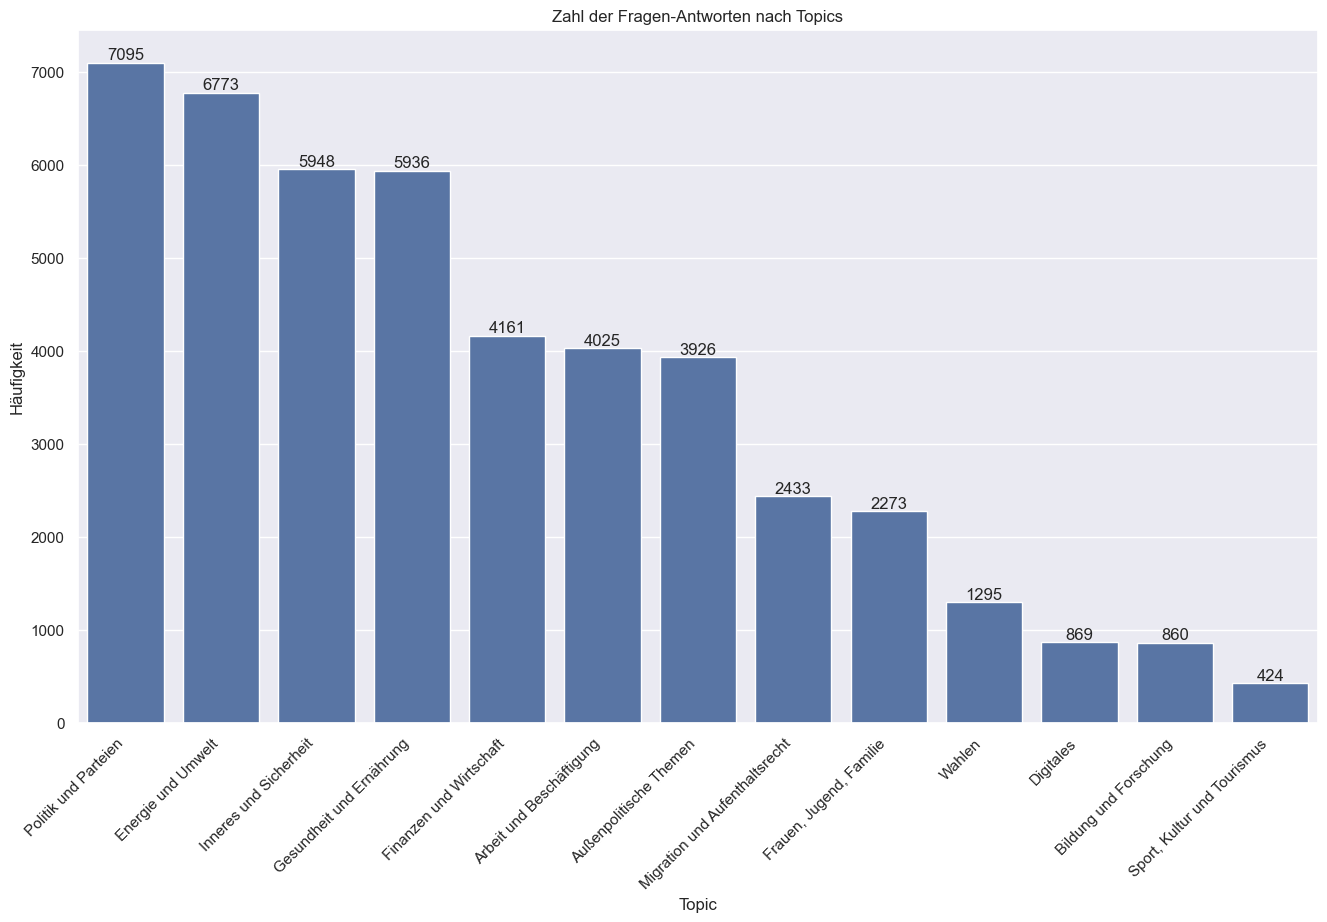

In [ ]:
# display topics and number of answers in barchart
sns.set_theme()
plt.figure(figsize=(16,9))

ax = sns.countplot(
    data=data,
    x="mapped_topic",
    order=data["mapped_topic"].value_counts().index
)

# show values over bars
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Topic")
plt.ylabel("Häufigkeit")
plt.title("Zahl der Fragen-Antworten nach Topics")

plt.xticks(rotation=45, ha="right")
plt.show()